Ref: https://towardsdatascience.com/introducing-pydicom-its-classes-methods-and-attributes-518c1d71162

DATASET LINK: https://www.kaggle.com/datasets/dmisky/dlwptvolumetricdicomlung/code

In [1]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.0 MB/s eta 0:00:00


In [2]:
# Import the pacakage
import pydicom

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading a DICOM file from a specific path
dcm_data = pydicom.dcmread('/content/drive/MyDrive/dicomsample/000055.dcm')
#dcm_data = pydicom.dcmread('000075.dcm')

dcm_data

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.174612129044952622307175909997
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.174612129044952622307175909997
(0008,0020) Study Date    

In [5]:
!pip install matplotlib

In [6]:
from matplotlib import pyplot as plt

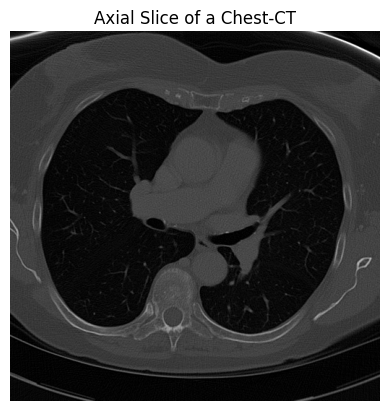

In [7]:
# Image representation
im = dcm_data.pixel_array

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Axial Slice of a Chest-CT')
plt.show()

In [8]:
# Extract the patient's name.
patient_name = dcm_data.PatientName
patient_name

'C3N-00247'

In [9]:
dcm_data[0x0010, 0x0010]

(0010,0010) Patient's Name                      PN: 'C3N-00247'

In [11]:
# Return the element's keyword (if known) as str
kwrds = dcm_data[0x0020, 0x0010].keyword

# Return the DICOM dictionary name for the element as str
name = dcm_data[0x0010, 0x0010].name

# Return the element's Value Representation
vr = dcm_data[0x0010, 0x0010].VR

# Return the element's value.
value = dcm_data[0x0010, 0x0010].value

print("The element's Keyword              : ", kwrds)
print("The element's name                 : ", name)
print("The element's Value Representation : ", vr)
print("The element's value                : ", value)

The element's Keyword              :  StudyID
The element's name                 :  Patient's Name
The element's Value Representation :  PN
The element's value                :  C3N-00247


**XRAY DICOM**

In [12]:
# Reading a DICOM file from a specific path
dcm_data = pydicom.dcmread('/content/drive/MyDrive/dicomsample/xdicom.dicom')
dcm_data

/usr/local/lib/python3.12/dist-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '00a2145de1886cb9eb88869c85d74080'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)


Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 158
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 00a2145de1886cb9eb88869c85d74080
(0002,0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002,0012) Implementation Class UID            UI: 1.2.3.4
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0010,0040) Patient's Sex                       CS: 'M'
(0010,1010) Patient's Age                       AS: '058Y'
(0028,0002) Samples per Pixel                   US: 1
(0028,0004) Photometric Interpretation          CS: 'MONOCHROME1'
(0028,0010) Rows                                US: 2408
(0028,0011) Columns                             US: 2136
(0028,0100) Bits Allocated       

a) Viewing DICOM Image


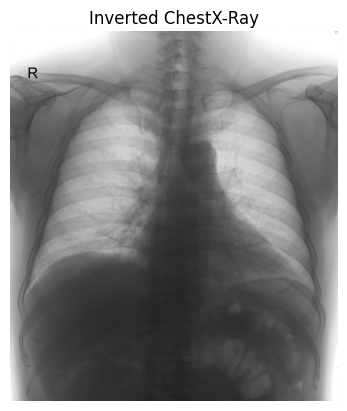

In [13]:
im = dcm_data.pixel_array

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Inverted ChestX-Ray')
plt.show()

**Non inverted X-Ray**

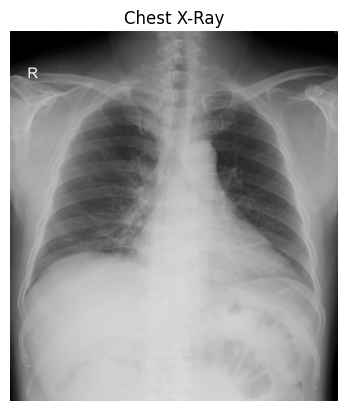

In [14]:
im = dcm_data.pixel_array

plt.imshow(im, cmap='gray_r')
plt.axis('off')
plt.title('Chest X-Ray')
plt.show()